<a href="https://colab.research.google.com/github/dee-hub/Titanic-Survival-Prediction/blob/master/TITANIC_DISASTER_SURVIVAL_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
url1 = 'https://raw.githubusercontent.com/dee-hub/Datasets/master/test.csv'
url2 = 'https://raw.githubusercontent.com/dee-hub/Datasets/master/train.csv'

In [0]:
import pandas as pd
data = pd.read_csv(url1)
data2 = pd.read_csv(url2)

In [0]:
titanic_dataset = pd.concat([data, data2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [0]:
#Check for missing values in every columns
titanic_dataset.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [0]:
#Drop Stupid columns
titanic_dataset.drop('Cabin', axis=1, inplace=True)
titanic_dataset.drop('Name', axis=1, inplace=True)
titanic_dataset.drop('Ticket', axis=1, inplace=True)

In [0]:
titanic_dataset.dtypes

Age            float64
Embarked        object
Fare           float64
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
dtype: object

In [0]:
median = titanic_dataset["Age"].median()
titanic_dataset["Age"].fillna(median, inplace=True)
median = titanic_dataset["Survived"].median()
titanic_dataset["Survived"].fillna(median, inplace=True)
median = titanic_dataset["Fare"].median()
titanic_dataset["Fare"].fillna(median, inplace=True)
titanic_dataset.dropna(subset=["Embarked"], inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
titanic_dataset["Sex"] = labelenc.fit_transform(titanic_dataset["Sex"].values)

In [0]:
titanic_dataset.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,34.5,Q,7.8292,0,892,3,1,0,0.0
1,47.0,S,7.0000,0,893,3,0,1,0.0
2,62.0,Q,9.6875,0,894,2,1,0,0.0
3,27.0,S,8.6625,0,895,3,1,0,0.0
4,22.0,S,12.2875,1,896,3,0,1,0.0


In [0]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
titanic_dataset["Embarked"] = labelenc.fit_transform(titanic_dataset["Embarked"].values)

In [0]:
titanic_dataset.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,34.5,1,7.8292,0,892,3,1,0,0.0
1,47.0,2,7.0000,0,893,3,0,1,0.0
2,62.0,1,9.6875,0,894,2,1,0,0.0
3,27.0,2,8.6625,0,895,3,1,0,0.0
4,22.0,2,12.2875,1,896,3,0,1,0.0


In [0]:
titanic_dataset.isna().sum()

Age            0
Embarked       0
Fare           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
dtype: int64

In [0]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 890
Data columns (total 9 columns):
Age            1307 non-null float64
Embarked       1307 non-null int64
Fare           1307 non-null float64
Parch          1307 non-null int64
PassengerId    1307 non-null int64
Pclass         1307 non-null int64
Sex            1307 non-null int64
SibSp          1307 non-null int64
Survived       1307 non-null float64
dtypes: float64(3), int64(6)
memory usage: 102.1 KB


In [0]:
X = titanic_dataset.drop("Survived", axis=1)
Y = titanic_dataset["Survived"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1045, 8)
(262, 8)
(1045,)
(262,)


In [0]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [0]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [0]:
acc_sgd

73.88

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [0]:
acc_random_forest

100.0

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
acc_log

84.59

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [0]:
acc_knn

84.78

In [0]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gauss = round(gaussian.score(X_train, Y_train) * 100, 2)

In [0]:
acc_gauss

83.44

In [0]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
acc_perceptron

74.35

In [0]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
acc_linear_svc

79.62

In [0]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [0]:
acc_decision_tree

100.0

In [0]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gauss, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
84.78,KNN
84.59,Logistic Regression
83.44,Naive Bayes
79.62,Support Vector Machines
74.35,Perceptron
73.88,Stochastic Gradient Decent


In [0]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82857143 0.88571429 0.91428571 0.83809524 0.85714286 0.9047619
 0.93333333 0.89423077 0.89320388 0.85436893]
Mean: 0.8803708346669511
Standard Deviation: 0.032590718678542546


In [0]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 87.46000000000001 %


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[738,  39],
       [ 95, 173]])

In [0]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8160377358490566
Recall: 0.6455223880597015


In [0]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7208333333333333

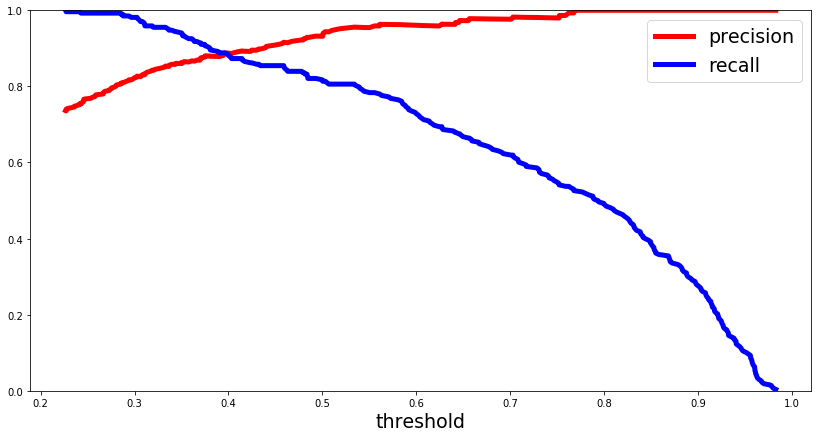

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

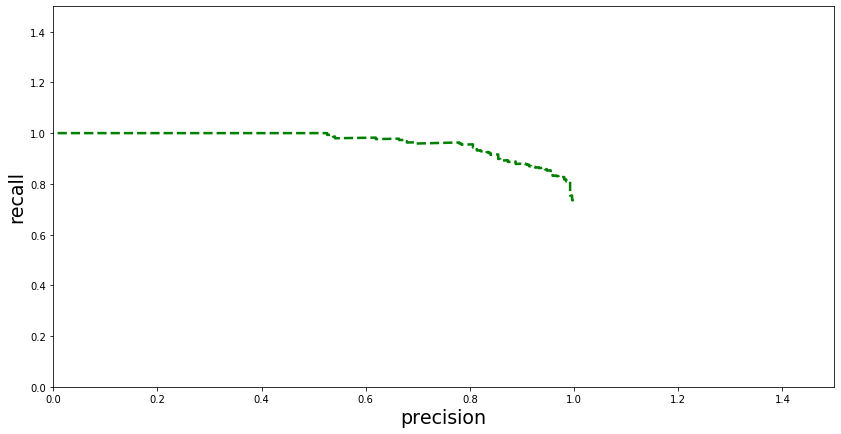

In [0]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

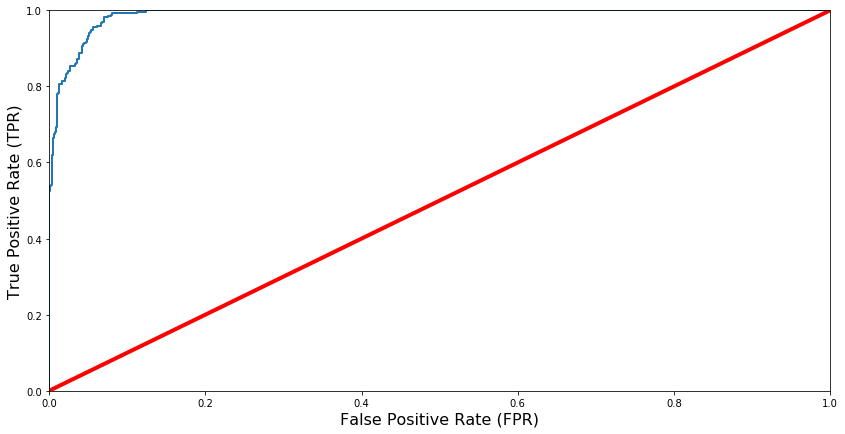

In [0]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9888683993161606
